In [1]:
from cv2 import imread
from pyFusion.fusion import *
from pyFusion import metrics

import matplotlib.pyplot as plt

In [2]:
# Read images

images_path = ['images/MRI-CT/ct.png', 'images/MRI-CT/mr.png']
output = 'results/MRI-CT/'
images = []
for image in images_path:
    images.append(imread(image,0))
im0 = images[0]
im1 = images[1]

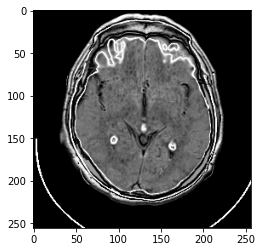

In [3]:
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/ImageFusionWavelets/MRI-CT.jpg', 0)
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/ImageFusionVisualSaliency/MRI-CT/fused.jpg', 0)
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/GFF/MRI-CT/GFF_MRI-CT.jpg', 0)
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LICNN/MRI-CT/LICNN_MRI-CT.jpg', 0)
fused_image = imread('results/MRI-CT/fusion_ct_mr.png', 0)

#--------------------------------LEGACY
#f = Image_fusion_tool('output')
#fused_image = f.pyramid_image_fusion(im0, im1, 'weighted')
#fused_image = f.weighted_average_fusion(im0,im1,0.7,0.3)
#fused_image = f.HSI_image_fusion(images[0],images[1]) # solo per immagini a colori
#fused_image = f.PCA_image_fusion(im0, im1)
#fused_image = f.PCA_fusion(im0, im1)

# fused_img = np.clip(fused_image, 0, 1)
# fused_image =(fused_image * 255).astype(np.uint8)
#----------------------------------

plt.imshow(fused_image, cmap='gray')
# imwrite(output+'<nome>.jpg', fused_image)

In [4]:
metrics.xydeas_petrovic_metric(im0, im1, fused_image)

0.7602910754399571

In [5]:
metrics.xydeas_petrovic_total_fusion_gain(im0, im1, fused_image)

0.5608932335304606

In [6]:
metrics.xydeas_petrovic_fusion_loss_artifact(im0, im1, fused_image)

(0.1587089082113383, 0.0019042122354108746)

In [7]:
mse0 = metrics.mean_squared_error(im0, fused_image) 
mse1 = metrics.mean_squared_error(im1, fused_image) 
mean_mse = (mse0 + mse1) / 2
mean_mse  

3314.6087951660156

In [8]:
en0 = metrics.entropy_2d(im0, fused_image)
en1 = metrics.entropy_2d(im1, fused_image)
mean_entropy = (en0 + en1) / 2
mean_entropy

4.091306526016625

In [9]:
mi0 = metrics.mutual_information_2d(im0, fused_image)
mi1 = metrics.mutual_information_2d(im1, fused_image)
mean_mi = (mi0 + mi1) / 2
mi0

1.072462163537637

In [10]:
ssim0 = metrics.ssim(im0, fused_image)
ssim1 = metrics.ssim(im1, fused_image)
mean_ssim = (ssim0 + ssim1) / 2
mean_ssim

0.6840028415195583

In [11]:
d0 = metrics.discrepancy(im0, fused_image)
d1 = metrics.discrepancy(im1, fused_image)
mean_discrepancy = (d0 + d1) / 2
mean_discrepancy

3607270.0